In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



%matplotlib inline

In [2]:
data = pd.read_csv("train_dataset.csv")
testing_data = pd.read_csv("test_dataset.csv")

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,18,1.82,142.10,yes,yes,3.00,3.00,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,32,1.84,98.26,yes,yes,2.33,1.82,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II
2,Male,24,1.76,117.33,yes,yes,1.54,3.00,Sometimes,no,2.00,no,1.63,0.631,NaN,Public_Transportation,Obesity_Type_II
3,Female,26,1.62,110.68,yes,yes,3.00,3.00,Sometimes,no,2.69,no,0.00,0.425,NaN,Public_Transportation,Obesity_Type_III
4,Male,32,1.78,121.20,yes,yes,2.76,3.00,Sometimes,no,2.16,no,0.43,0.716,NaN,Automobile,Obesity_Type_II


In [4]:
data.info()
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1900 non-null   object 
 1   Age                             1900 non-null   int64  
 2   Height                          1900 non-null   float64
 3   Weight                          1900 non-null   float64
 4   family_history_with_overweight  1900 non-null   object 
 5   FAVC                            1900 non-null   object 
 6   FCVC                            1888 non-null   float64
 7   NCP                             1900 non-null   float64
 8   CAEC                            1900 non-null   object 
 9   SMOKE                           1900 non-null   object 
 10  CH2O                            1900 non-null   float64
 11  SCC                             1900 non-null   object 
 12  FAF                             19

In [5]:
print(sum(data.duplicated()))
print(sum(testing_data.duplicated()))

22
0


In [6]:
#delete dublicated rows
data = data.drop_duplicates()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1878 non-null   object 
 1   Age                             1878 non-null   int64  
 2   Height                          1878 non-null   float64
 3   Weight                          1878 non-null   float64
 4   family_history_with_overweight  1878 non-null   object 
 5   FAVC                            1878 non-null   object 
 6   FCVC                            1866 non-null   float64
 7   NCP                             1878 non-null   float64
 8   CAEC                            1878 non-null   object 
 9   SMOKE                           1878 non-null   object 
 10  CH2O                            1878 non-null   float64
 11  SCC                             1878 non-null   object 
 12  FAF                             1878 no

In [8]:
data.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              12
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                              28
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [9]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,18,1.82,142.10,yes,yes,3.00,3.00,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,32,1.84,98.26,yes,yes,2.33,1.82,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II
2,Male,24,1.76,117.33,yes,yes,1.54,3.00,Sometimes,no,2.00,no,1.63,0.631,NaN,Public_Transportation,Obesity_Type_II
3,Female,26,1.62,110.68,yes,yes,3.00,3.00,Sometimes,no,2.69,no,0.00,0.425,NaN,Public_Transportation,Obesity_Type_III
4,Male,32,1.78,121.20,yes,yes,2.76,3.00,Sometimes,no,2.16,no,0.43,0.716,NaN,Automobile,Obesity_Type_II


In [10]:
#                                                     fill nulls

data['FCVC'] = data['FCVC'].fillna(data['FCVC'].median())
data['CALC'] = data['CALC'].fillna(data['CALC'].mode()[0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1878 non-null   object 
 1   Age                             1878 non-null   int64  
 2   Height                          1878 non-null   float64
 3   Weight                          1878 non-null   float64
 4   family_history_with_overweight  1878 non-null   object 
 5   FAVC                            1878 non-null   object 
 6   FCVC                            1878 non-null   float64
 7   NCP                             1878 non-null   float64
 8   CAEC                            1878 non-null   object 
 9   SMOKE                           1878 non-null   object 
 10  CH2O                            1878 non-null   float64
 11  SCC                             1878 non-null   object 
 12  FAF                             1878 no

In [12]:
# show the value count for every column

for x in data.columns:
  if data[x].dtype == 'object':
    print(data[x].value_counts(), "\n")


Gender
Male      943
Female    935
Name: count, dtype: int64 

family_history_with_overweight
yes    1546
no      332
Name: count, dtype: int64 

FAVC
yes    1669
no      209
Name: count, dtype: int64 

CAEC
Sometimes     1585
Frequently     214
Always          46
no              33
Name: count, dtype: int64 

SMOKE
no     1838
yes      40
Name: count, dtype: int64 

SCC
no     1789
yes      89
Name: count, dtype: int64 

CALC
Sometimes     1242
no             570
Frequently      65
Always           1
Name: count, dtype: int64 

MTRANS
Public_Transportation    1412
Automobile                402
Walking                    50
Motorbike                   9
Bike                        5
Name: count, dtype: int64 

NObeyesdad
Obesity_Type_I         322
Obesity_Type_III       296
Obesity_Type_II        259
Overweight_Level_II    256
Normal_Weight          251
Overweight_Level_I     251
Insufficient_Weight    243
Name: count, dtype: int64 



In [13]:
#                                                     handling the outliers

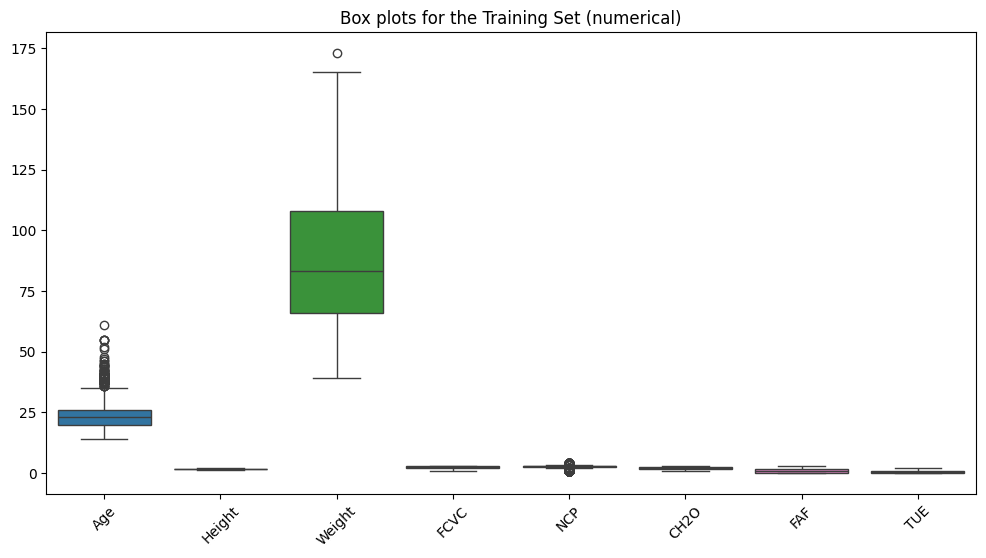

In [14]:

# Get all BoxPlots of the Training set( seaborn and matplotlib )
plt.figure(figsize=(12, 6))
plt.title("Box plots for the Training Set (numerical)")
sns.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()


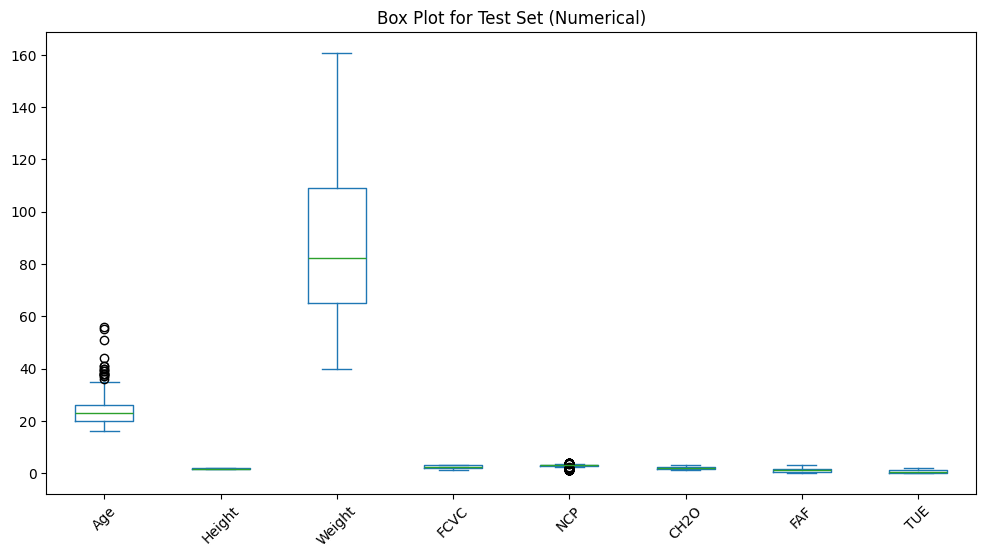

In [15]:
# Get all BoxPlots of the TestSet using (pandas and matplotlib)
testing_data.select_dtypes(include='number').plot(kind='box', figsize=(12, 6))
plt.title("Box Plot for Test Set (Numerical)")
plt.xticks(rotation=45)
plt.show()

In [16]:
# we can use (IQR , ZScore)
# Outliers function of number columns  using the IQR
def handleOutliers(train):
  # Get the cols dtype (numbers)
  cols=train.select_dtypes(include=np.number).columns
  for col in cols:
    # this is using the quantiles but we can use percentiles(5 and 95 with the data.clip(lower=train[col].quantile(0.05) , upper=train[col].quantile(0.95)))
    Q1=train[col].quantile(0.25)
    Q3=train[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-IQR*1.5
    upper_bound=Q3+IQR*1.5
    train[col]=train[col].apply(lambda x: lower_bound if x<lower_bound else (upper_bound if x>upper_bound else x)) # lambda and ternary condition
  return train

In [17]:
# calling the outlier function
data=handleOutliers(data)
testing_data=handleOutliers(testing_data)

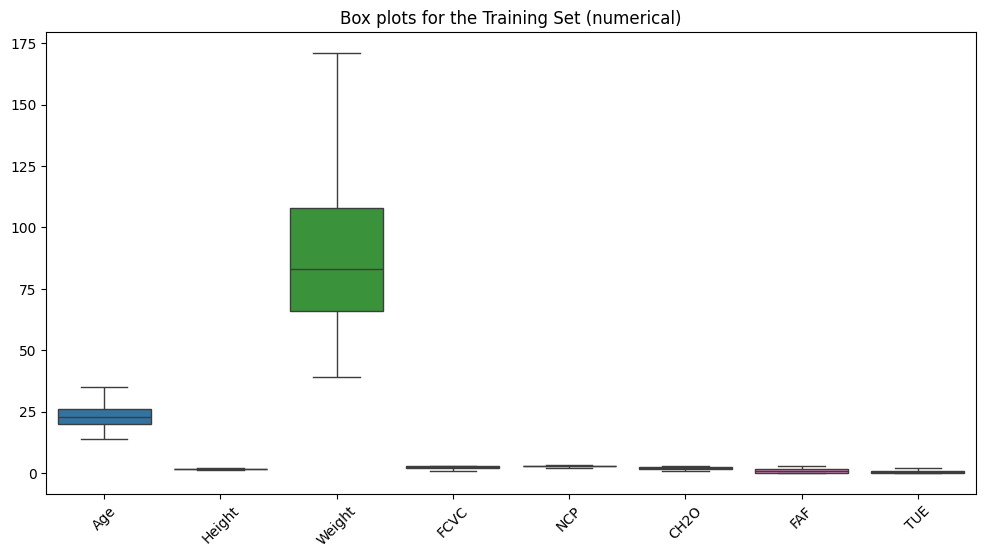

In [18]:
# Get the box plots of the x_training set again to check
plt.figure(figsize=(12,6))
plt.title("Box plots for the Training Set (numerical)")
sns.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()

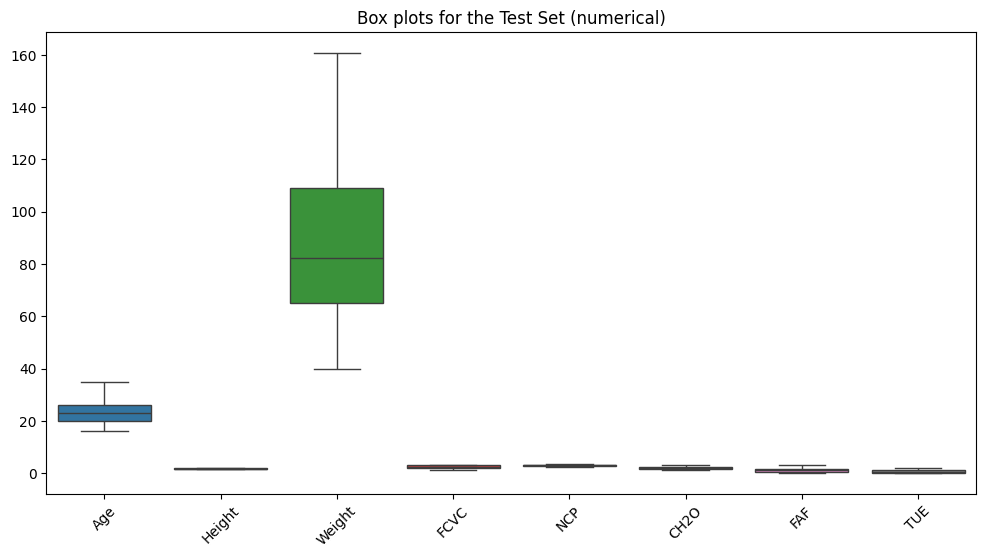

In [19]:
# Get the box plots of x_test set again to check
plt.figure(figsize=(12,6))
plt.title("Box plots for the Test Set (numerical)")
sns.boxplot(data=testing_data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1878 non-null   object 
 1   Age                             1878 non-null   float64
 2   Height                          1878 non-null   float64
 3   Weight                          1878 non-null   float64
 4   family_history_with_overweight  1878 non-null   object 
 5   FAVC                            1878 non-null   object 
 6   FCVC                            1878 non-null   float64
 7   NCP                             1878 non-null   float64
 8   CAEC                            1878 non-null   object 
 9   SMOKE                           1878 non-null   object 
 10  CH2O                            1878 non-null   float64
 11  SCC                             1878 non-null   object 
 12  FAF                             1878 no

In [21]:
#                                                           Encoding the Data

In [22]:
# encodin using label encoder (built in function)
# from sklearn.preprocessing import LabelEncoder

# labelEncoder = LabelEncoder()
# # to can revers the encoding
# inverseEncoder = {}
# inverseEncoderTest = {}

# # loop on the train data columns
# for col in data.columns :
#   if(data[col].dtype=='object'):
#     data[col] = labelEncoder.fit_transform(data[col])
#     inverseEncoder[col] = labelEncoder.classes_

# # loop on the test data columns
# for col in testing_data.columns :
#   if(testing_data[col].dtype=='object'):
#     testing_data[col] = labelEncoder.fit_transform(testing_data[col])
#     inverseEncoderTest[col] = labelEncoder.classes_



In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1878 non-null   object 
 1   Age                             1878 non-null   float64
 2   Height                          1878 non-null   float64
 3   Weight                          1878 non-null   float64
 4   family_history_with_overweight  1878 non-null   object 
 5   FAVC                            1878 non-null   object 
 6   FCVC                            1878 non-null   float64
 7   NCP                             1878 non-null   float64
 8   CAEC                            1878 non-null   object 
 9   SMOKE                           1878 non-null   object 
 10  CH2O                            1878 non-null   float64
 11  SCC                             1878 non-null   object 
 12  FAF                             1878 no

In [24]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,18.0,1.82,142.10,yes,yes,3.00,3.00000,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,32.0,1.84,98.26,yes,yes,2.33,2.23125,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II
2,Male,24.0,1.76,117.33,yes,yes,1.54,3.00000,Sometimes,no,2.00,no,1.63,0.631,Sometimes,Public_Transportation,Obesity_Type_II
3,Female,26.0,1.62,110.68,yes,yes,3.00,3.00000,Sometimes,no,2.69,no,0.00,0.425,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,32.0,1.78,121.20,yes,yes,2.76,3.00000,Sometimes,no,2.16,no,0.43,0.716,Sometimes,Automobile,Obesity_Type_II


In [25]:
# convert string to int values (encoding manual)

GenderMap = {
    'Male': 1,
    'Female': 0
}

data['Gender'] = data['Gender'].map(GenderMap)
testing_data['Gender'] = testing_data['Gender'].map(GenderMap)

yes_no_map = {
    "yes": 1,
    "no": 0
}
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(yes_no_map)
testing_data['family_history_with_overweight'] = testing_data['family_history_with_overweight'].map(yes_no_map)

data['FAVC'] = data['FAVC'].map(yes_no_map)
testing_data['FAVC'] = testing_data['FAVC'].map(yes_no_map)

Frequency_map = {
    'no': 0,
    'Sometimes': 3,
    'Frequently': 6,
    'Always': 10
}
data['CAEC'] = data['CAEC'].map(Frequency_map)
testing_data['CAEC'] = testing_data['CAEC'].map(Frequency_map)

data['SMOKE'] = data['SMOKE'].map(yes_no_map)
testing_data['SMOKE'] = testing_data['SMOKE'].map(yes_no_map)

data['SCC'] = data['SCC'].map(yes_no_map)
testing_data['SCC'] = testing_data['SCC'].map(yes_no_map)

data['CALC'] = data['CALC'].map(Frequency_map)
testing_data['CALC'] = testing_data['CALC'].map(Frequency_map)

transportaion_map = {
    'Automobile': 0,
    'Public_Transportation': 1,
    'Motorbike': 2,
    'Bike': 3,
    'Walking': 4
}
data['MTRANS'] = data['MTRANS'].map(transportaion_map)
testing_data['MTRANS'] = testing_data['MTRANS'].map(transportaion_map)
# MTRANS_dummies = pd.get_dummies(data['MTRANS'], prefix='MTRANS')
# data = pd.concat([data.drop('MTRANS', axis=1), MTRANS_dummies], axis=1)
# MTRANS_dummies_test = pd.get_dummies(testing_data['MTRANS'], prefix='MTRANS')
# testing_data = pd.concat([testing_data.drop('MTRANS', axis=1), MTRANS_dummies_test], axis=1)



weight_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
data['NObeyesdad'] = data['NObeyesdad'].map(weight_map)
testing_data['NObeyesdad'] = testing_data['NObeyesdad'].map(weight_map)



In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1878 non-null   int64  
 1   Age                             1878 non-null   float64
 2   Height                          1878 non-null   float64
 3   Weight                          1878 non-null   float64
 4   family_history_with_overweight  1878 non-null   int64  
 5   FAVC                            1878 non-null   int64  
 6   FCVC                            1878 non-null   float64
 7   NCP                             1878 non-null   float64
 8   CAEC                            1878 non-null   int64  
 9   SMOKE                           1878 non-null   int64  
 10  CH2O                            1878 non-null   float64
 11  SCC                             1878 non-null   int64  
 12  FAF                             1878 no

In [27]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,18.0,1.82,142.10,1,1,3.00,3.00000,3,0,2.71,0,2.00,0.814,3,1,6
1,1,32.0,1.84,98.26,1,1,2.33,2.23125,3,0,2.56,0,1.33,0.481,3,0,3
2,1,24.0,1.76,117.33,1,1,1.54,3.00000,3,0,2.00,0,1.63,0.631,3,1,5
3,0,26.0,1.62,110.68,1,1,3.00,3.00000,3,0,2.69,0,0.00,0.425,3,1,6
4,1,32.0,1.78,121.20,1,1,2.76,3.00000,3,0,2.16,0,0.43,0.716,3,0,5


In [28]:
X = data.drop(columns=['NObeyesdad'])
Y = data['NObeyesdad']

X_Test = testing_data.drop(columns=["NObeyesdad"])
Y_Test = testing_data['NObeyesdad']


In [29]:
#                                                      Normalizing The Data

In [30]:
#Scalling and Normalizing/Standard => we can use built in methods like (MinMaxScaller - StandardScaller) or you can implement with max ,min or std


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaler=scaler.fit_transform(X)
X_Test_scaler=scaler.transform(X_Test)

X=pd.DataFrame(X_scaler,columns=X.columns)
X_Test=pd.DataFrame(X_Test_scaler,columns=X_Test.columns)

In [31]:
X.head() # check the normalize on the train data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,0.190476,0.698113,0.781246,1.0,1.0,1.000,0.625,0.3,0.0,0.855,0.0,0.666667,0.4070,0.3,0.25
1,1.0,0.857143,0.735849,0.449046,1.0,1.0,0.665,0.000,0.3,0.0,0.780,0.0,0.443333,0.2405,0.3,0.00
2,1.0,0.476190,0.584906,0.593550,1.0,1.0,0.270,0.625,0.3,0.0,0.500,0.0,0.543333,0.3155,0.3,0.25
3,0.0,0.571429,0.320755,0.543159,1.0,1.0,1.000,0.625,0.3,0.0,0.845,0.0,0.000000,0.2125,0.3,0.25
4,1.0,0.857143,0.622642,0.622875,1.0,1.0,0.880,0.625,0.3,0.0,0.580,0.0,0.143333,0.3580,0.3,0.00


In [32]:
X_Test.head()  # check the normalize on the test data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1.0,1.000000,0.490566,0.346446,1.0,1.0,0.94,0.625,0.3,0.0,1.000,0.0,0.666667,0.416,0.0,0.00
1,1.0,0.238095,0.566038,0.462231,1.0,1.0,0.50,0.625,0.6,0.0,0.500,0.0,0.666667,0.000,0.0,0.25
2,1.0,0.238095,0.754717,0.197016,1.0,0.0,0.50,0.625,0.3,0.0,1.000,0.0,0.666667,0.500,0.3,0.75
3,1.0,0.809524,0.622642,0.618631,1.0,1.0,0.75,0.625,0.3,0.0,0.520,0.0,0.280000,0.245,0.3,0.00
4,1.0,0.523810,0.660377,0.620601,1.0,1.0,0.60,0.625,0.3,0.0,0.755,0.0,0.553333,0.064,0.3,0.25


In [33]:
#                                                     Feature Selection

In [34]:
# giving the corelation between the features and the target

correlation_with_target = data.corr()['NObeyesdad'].sort_values(ascending=False)
print(correlation_with_target)

NObeyesdad                        1.000000
Weight                            0.912874
family_history_with_overweight    0.504136
Age                               0.326401
FAVC                              0.247151
FCVC                              0.231052
CALC                              0.155326
CH2O                              0.134555
Height                            0.121440
SMOKE                            -0.002298
Gender                           -0.039361
NCP                              -0.043767
MTRANS                           -0.099934
TUE                              -0.110490
SCC                              -0.196098
FAF                              -0.206686
CAEC                             -0.337896
Name: NObeyesdad, dtype: float64


In [35]:
#  SMOKE feature it has no corelation but (GENDER  and NCP) has weak coreltaion

# X = X.drop(columns=["NCP", "SMOKE", "Gender"])
# X_Test = X_Test.drop(columns=["NCP", "SMOKE", "Gender"])

X = X.drop(columns=["SMOKE"])
X_Test = X_Test.drop(columns=["SMOKE"])

In [36]:
# calling the outliers function for the x and x_test
X=handleOutliers(X)
X_Test=handleOutliers(X_Test)

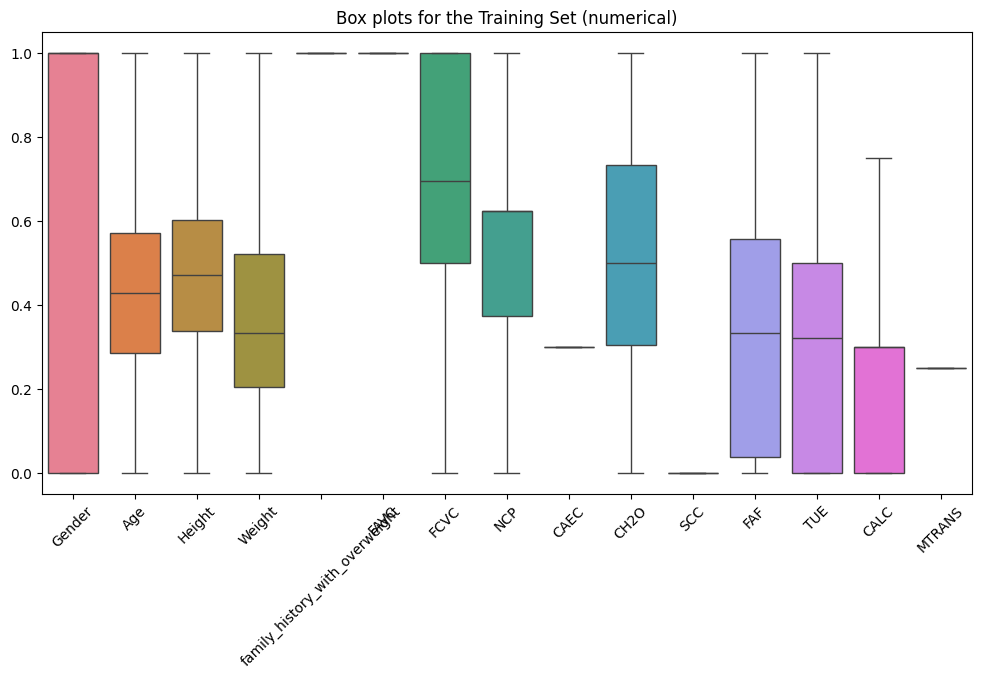

In [37]:
# Get the box plots of the x_training set again to check
plt.figure(figsize=(12,6))
plt.title("Box plots for the Training Set (numerical)")
sns.boxplot(data=X.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()

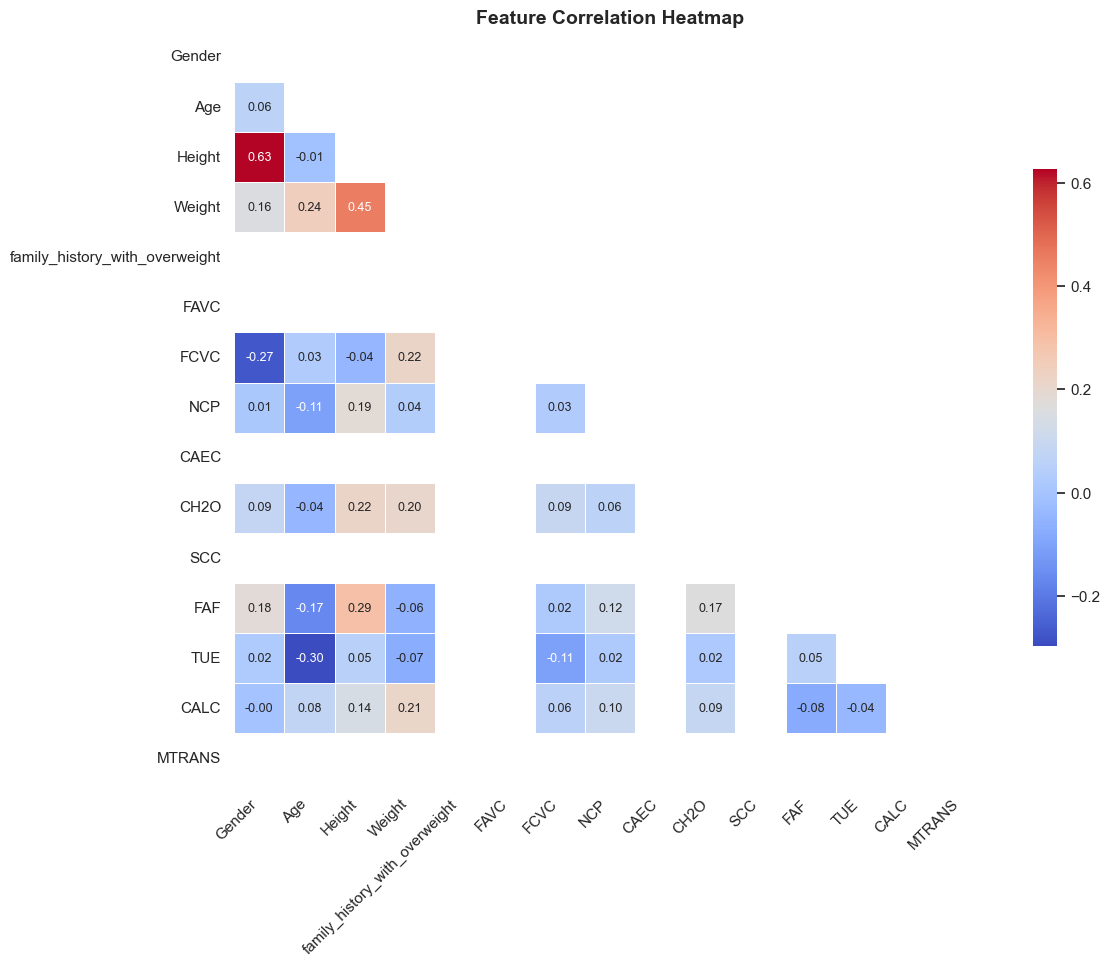

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix
corr = X.corr()

# Create a mask to display only the lower triangle
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))  # upper triangle mask

# Set the figure size (adjust depending on number of features)
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=True,             # show correlation values
    cmap='coolwarm',        # color map
    fmt=".2f",              # format for numbers
    annot_kws={"size": 9},  # font size of annotations
    linewidths=.5,          # line width between cells
    cbar_kws={"shrink": .6},# shrink colorbar
    square=True             # make cells square
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add a title
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')

# Fit layout
plt.tight_layout()

# Show plot
plt.show()


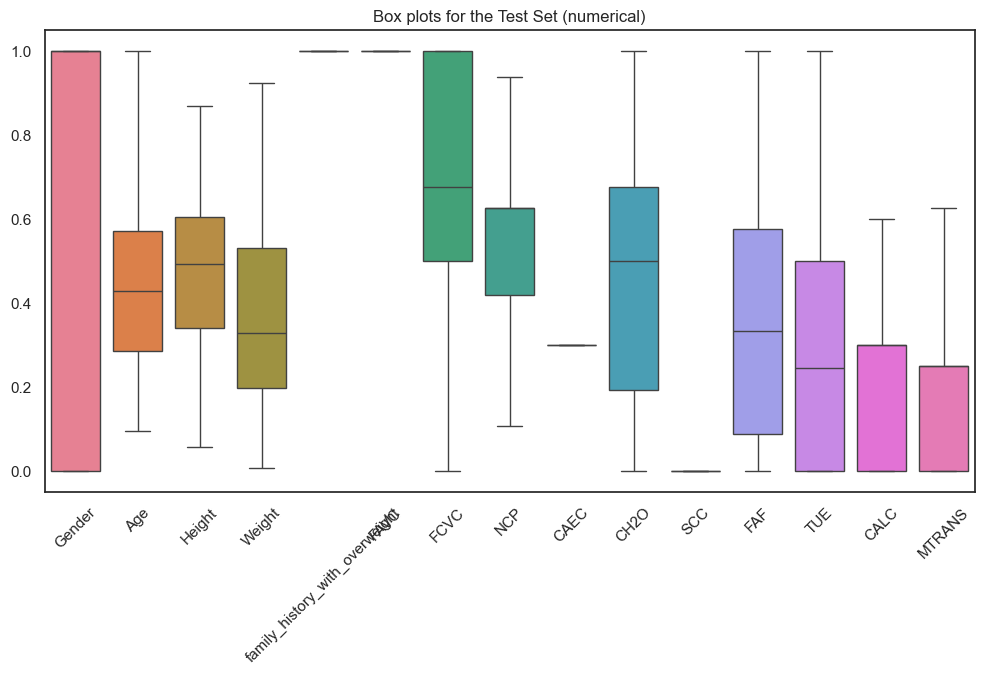

In [39]:
# Get the box plots of x_test set again to check
plt.figure(figsize=(12,6))
plt.title("Box plots for the Test Set (numerical)")
sns.boxplot(data=X_Test.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()

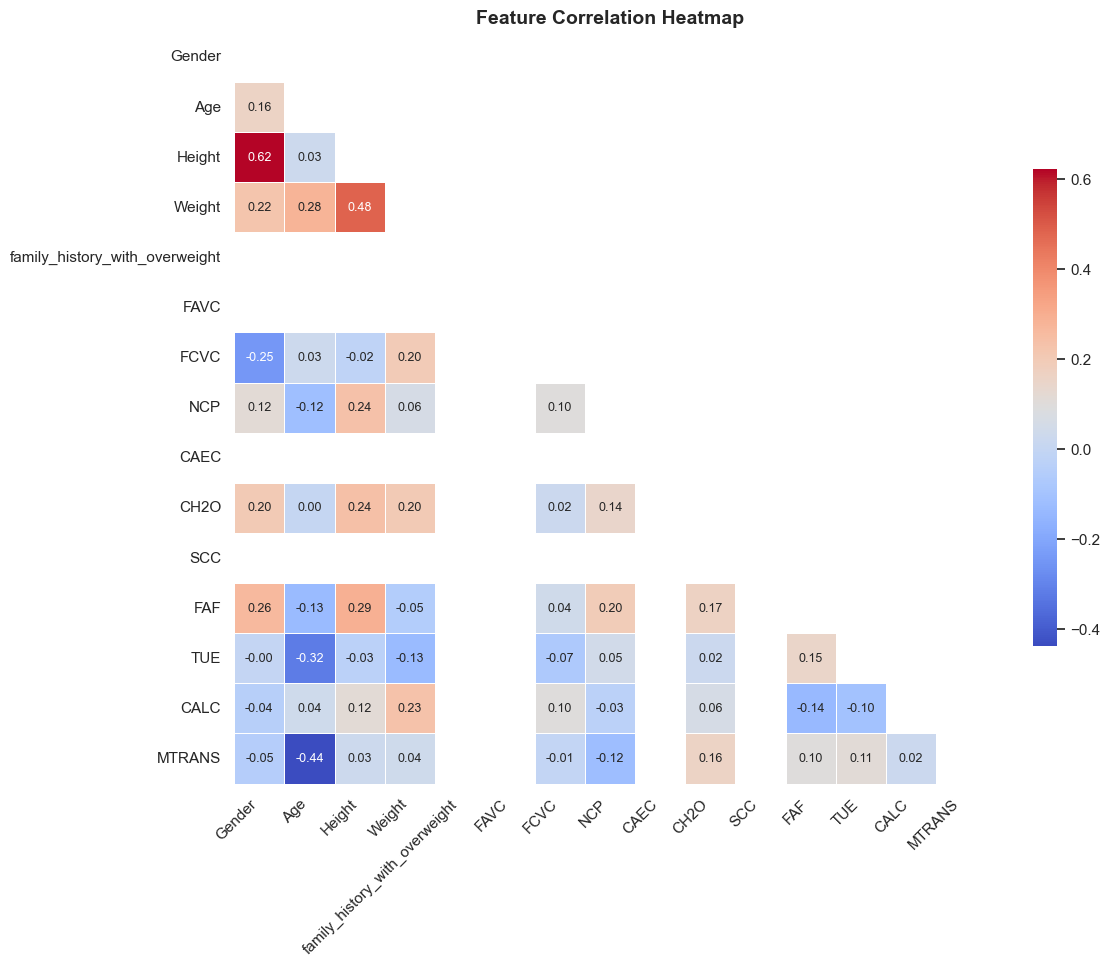

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix
corr = X_Test.corr()

# Create a mask to display only the lower triangle
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))  # upper triangle mask

# Set the figure size (adjust depending on number of features)
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=True,             # show correlation values
    cmap='coolwarm',        # color map
    fmt=".2f",              # format for numbers
    annot_kws={"size": 9},  # font size of annotations
    linewidths=.5,          # line width between cells
    cbar_kws={"shrink": .6},# shrink colorbar
    square=True             # make cells square
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add a title
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')

# Fit layout
plt.tight_layout()

# Show plot
plt.show()


In [41]:
# KNN_Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the base model
knn = KNeighborsClassifier()

# Define hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Apply Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train the model on training data
grid_search.fit(X, Y)

# Get best model
best_knn = grid_search.best_estimator_

# Predict on test data
y_pred = best_knn.predict(X_Test)

# Evaluate performance
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(Y_Test, y_pred))
print("Classification Report:\n", classification_report(Y_Test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.8862559241706162
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.78      0.66      0.71        32
           2       0.81      0.96      0.88        26
           3       0.85      0.85      0.85        34
           4       0.93      0.86      0.89        29
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        28

    accuracy                           0.89       211
   macro avg       0.88      0.89      0.88       211
weighted avg       0.89      0.89      0.88       211



In [42]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the model
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
# Train the model
model.fit(X, Y)

# Predict on test data
y_pred = model.predict(X_Test)

# Evaluation
print("Accuracy:", accuracy_score(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

train_preds = model.predict(X)

train_acc = accuracy_score(Y, train_preds)

print("Train Accuracy:", train_acc)


Accuracy: 0.981042654028436
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.97      0.98        32
           2       0.87      1.00      0.93        26
           3       1.00      0.91      0.95        34
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        28

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211

Train Accuracy: 1.0


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Model
rf_model = RandomForestClassifier()

# Parameter Grid
rf_params = {
    'n_estimators': [100, 150,200,1000],
    'max_depth': [None, 5,10, 20],
    'max_features': ['sqrt', 'log2']
}

# Grid Search
rf_grid = GridSearchCV(
    rf_model,
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X, Y)
y_pred_rf = rf_grid.best_estimator_.predict(X_Test)
y_pred_data = rf_grid.best_estimator_.predict(X)

# Evaluation
# print("Acurracy for training: ", accuracy_score(Y, y_pred_data))
print("Random Forest Best Params:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(Y_Test, y_pred_rf))
print("Classification Report:\n", classification_report(Y_Test, y_pred_rf))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Random Forest Best Params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
Accuracy: 0.966824644549763
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.86      0.94      0.90        32
           2       0.92      0.92      0.92        26
           3       1.00      0.91      0.95        34
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        28

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211



In [44]:
# Logisti Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg'],
}
# Logistic Regression Model
Logisticmodel=LogisticRegression(solver='newton-cg',penalty='l2',C=1000,random_state=42)
# GridSearchCV
grid_search = GridSearchCV(Logisticmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, Y)
best_params = grid_search.best_params_
# Get the best Params
print(f"Best Hyperparameters: {best_params}")
#fit the model
Logisticmodel.fit(X,Y)
# training accuracy
y_pred=Logisticmodel.predict(X_Test)
y_train_pred=Logisticmodel.predict(X)
print(f"the accuracy score of training set {accuracy_score(Y,y_train_pred)}")
print('#'*50)
print(f"the accuracy score of test set {accuracy_score(Y_Test,y_pred)}")
print(f"{classification_report(Y_Test,y_pred)}")
print(f"the confusion matrix is {confusion_matrix(Y_Test,y_pred)}")

Best Hyperparameters: {'C': 1000, 'solver': 'newton-cg'}
the accuracy score of training set 0.9675186368477103
##################################################
the accuracy score of test set 0.95260663507109
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.94      0.97        32
           2       0.84      1.00      0.91        26
           3       1.00      0.82      0.90        34
           4       0.93      0.93      0.93        29
           5       0.95      1.00      0.97        38
           6       1.00      1.00      1.00        28

    accuracy                           0.95       211
   macro avg       0.95      0.96      0.95       211
weighted avg       0.96      0.95      0.95       211

the confusion matrix is [[24  0  0  0  0  0  0]
 [ 1 30  1  0  0  0  0]
 [ 0  0 26  0  0  0  0]
 [ 0  0  4 28  2  0  0]
 [ 0  0  0  0 27  2  0]
 [ 0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0 28]]


In [43]:
# SVM Model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("Training basic SVM model...")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X, Y)

# Predict on the test set
svm_preds = svm_model.predict(X_Test)

# Evaluate the basic model
print("\n Basic SVM Results:")
print("Test Accuracy:", accuracy_score(Y_Test, svm_preds))
print("\nConfusion Matrix:\n", confusion_matrix(Y_Test, svm_preds))
print("\nClassification Report:\n", classification_report(Y_Test, svm_preds))

# --------------------------------------
# Hyperparameter Tuning with GridSearchCV
# --------------------------------------
print("\nStarting hyperparameter tuning...")
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Kernel type
}

# Create GridSearchCV object
grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1,          # Use all available cores
    verbose=1           # Show progress
)

# Perform grid search
grid.fit(X, Y)

# Results
print("\n Tuning Results:")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Get best estimator
best_svm = grid.best_estimator_

# Predict using the best model
best_svm_preds = best_svm.predict(X_Test)

# Evaluate the tuned model
print("\n Tuned SVM Results:")
print("Test Accuracy:", accuracy_score(Y_Test, best_svm_preds))
print("\nConfusion Matrix:\n", confusion_matrix(Y_Test, best_svm_preds))
print("\nClassification Report:\n", classification_report(Y_Test, best_svm_preds))

# Plot feature importance (for linear kernel)
if best_svm.kernel == 'linear':
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(X.columns)), best_svm.coef_[0], align='center')
    plt.yticks(range(len(X.columns)), X.columns)
    plt.title("Feature Importance (Linear SVM)")
    plt.show()


Training basic SVM model...

 Basic SVM Results:
Test Accuracy: 0.8483412322274881

Confusion Matrix:
 [[24  0  0  0  0  0  0]
 [ 7 20  5  0  0  0  0]
 [ 0  2 22  2  0  0  0]
 [ 0  4  3 22  5  0  0]
 [ 0  0  0  1 25  3  0]
 [ 0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        24
           1       0.77      0.62      0.69        32
           2       0.73      0.85      0.79        26
           3       0.88      0.65      0.75        34
           4       0.83      0.86      0.85        29
           5       0.93      1.00      0.96        38
           6       1.00      1.00      1.00        28

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.84       211
weighted avg       0.85      0.85      0.84       211


Starting hyperparameter tuning...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

 Tuning 

In [44]:
# %%
# Neural Network Model using TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# One-hot encode the target variable for the neural network
# Neural networks typically require the target variable to be one-hot encoded for multi-class classification
encoder = OneHotEncoder(sparse_output=False)
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))
Y_Test_encoded = encoder.transform(Y_Test.values.reshape(-1, 1))

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)), # Input layer
    keras.layers.Dropout(0.2), # Add dropout for regularization
    keras.layers.Dense(64, activation='relu'), # Hidden layer
    keras.layers.Dropout(0.2), # Add dropout
    keras.layers.Dense(Y_encoded.shape[1], activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X, Y_encoded, epochs=50, batch_size=32, validation_split=0.2,verbose=0)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_Test, Y_Test_encoded)
# print(f"\nTest Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test data
y_pred_probs = model.predict(X_Test)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

# Convert the one-hot encoded true labels back to original labels for evaluation metrics
Y_Test_original = tf.argmax(Y_Test_encoded, axis=1).numpy()

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(Y_Test_original, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_Test_original, y_pred))

ModuleNotFoundError: No module named 'tensorflow'

In [50]:
import numpy as np

# ---------- One-hot Encoding ----------
def one_hot_encode(y, num_classes):
    m = y.shape[0]
    y_encoded = np.zeros((m, num_classes))
    y_encoded[np.arange(m), y] = 1
    return y_encoded

# ---------- Softmax ----------
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# ---------- Initialization ----------
def initialize_weights(n_features, n_classes):
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))
    return W, b

# ---------- Forward ----------
def forward(X, W, b):
    Z = np.dot(X, W) + b
    return softmax(Z)

# ---------- Loss with Regularization ----------
def compute_loss(y_true, y_pred, W, reg_lambda=0.01):
    m = y_true.shape[0]
    data_loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m
    reg_loss = (reg_lambda / (2 * m)) * np.sum(W * W)
    return data_loss + reg_loss

# ---------- Backward with Regularization ----------
def backward(X, y_true, y_pred, W, reg_lambda=0.01):
    m = X.shape[0]
    dZ = y_pred - y_true
    dW = (np.dot(X.T, dZ) / m) + (reg_lambda / m) * W
    db = np.sum(dZ, axis=0, keepdims=True) / m
    return dW, db

# ---------- Predict ----------
def predict(X, W, b):
    probs = forward(X, W, b)
    return np.argmax(probs, axis=1)

# ---------- Accuracy ----------
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# ---------- Final Train Function ----------
def train(X, y, X_test, y_test, num_classes, learning_rate=0.1, epochs=1000, reg_lambda=0.01):
    n_samples, n_features = X.shape
    y_encoded = one_hot_encode(y, num_classes)

    W, b = initialize_weights(n_features, num_classes)

    for epoch in range(epochs):
        # Forward
        y_pred = forward(X, W, b)

        # Loss
        loss = compute_loss(y_encoded, y_pred, W, reg_lambda)

        # Backward
        dW, db = backward(X, y_encoded, y_pred, W, reg_lambda)

        # Update
        W -= learning_rate * dW
        b -= learning_rate * db

        # Evaluation
        if epoch % 100 == 0 or epoch == epochs - 1:
            train_acc = accuracy(y, predict(X, W, b))
            test_acc = accuracy(y_test, predict(X_test, W, b))
            # print(f"Epoch {epoch} | Loss: {loss:.4f} | Train Acc: {train_acc*100:.2f}% | Test Acc: {test_acc*100:.2f}%")

    return W, b


In [51]:
W, b = train(X, Y, X_Test, Y_Test, 7, 5, 5000, 0.01)

In [52]:
#
W, b = train(X, Y, X_Test, Y_Test, 7, 3, 5000, 0.01)


In [53]:
y_train_pred = predict(X, W, b)
y_test_pred = predict(X_Test, W, b)


In [54]:
train_acc = accuracy(Y, y_train_pred)
test_acc = accuracy(Y_Test, y_test_pred)

print(f"\n Final Training Accuracy: {train_acc * 100:.2f}%")
print(f" Final Testing Accuracy: {test_acc * 100:.2f}%")



 Final Training Accuracy: 85.57%
 Final Testing Accuracy: 85.31%
